In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('IBM.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-07-23,101.051628,102.246651,100.669212,101.195030,60.314636,6606222
1,2001-07-24,100.239006,101.481834,99.225624,99.913956,59.551090,7635591
2,2001-07-25,99.904396,101.051628,98.212234,100.277245,59.767632,6534990
3,2001-07-26,100.143402,101.338432,98.403442,101.338432,60.400089,8816420
4,2001-07-27,100.143402,101.290634,99.531548,100.095604,59.659351,4546439


In [3]:
df.shape

(5282, 7)

In [4]:
df.set_index('Date',inplace=True)

In [5]:
training_set = df.loc['2001-01-01':'2021-12-31']['Close'].to_numpy()
test_set = df.loc['2022-01-01':'2022-07-20']['Close'].to_numpy()

In [6]:
scaler = StandardScaler()
training_set = scaler.fit_transform(training_set.reshape(-1,1))

In [7]:
X_train = []
y_train = []

for i in range(120,5145):
    X_train.append(training_set[i-120:i,0])
    y_train.append(training_set[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) # no. of stock prices, no. of timeseries steps, no. of predictors

In [9]:
regressor = Sequential()

In [10]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))

In [11]:
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(loss='mean_squared_error',optimizer='adam')
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 120, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 100)          80400     
                                                                 
 dropout_1 (Dropout)         (None, 120, 100)          0         
                                                                 
 lstm_2 (LSTM)               (None, 120, 100)          80400     
                                                                 
 dropout_2 (Dropout)         (None, 120, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 120, 100)          8

In [13]:
regressor.fit(X_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
158/158 [==============================] - 51s 248ms/step - loss: 0.0627
Epoch 2/10
158/158 [==============================] - 40s 252ms/step - loss: 0.0289
Epoch 3/10
158/158 [==============================] - 40s 253ms/step - loss: 0.0233
Epoch 4/10
158/158 [==============================] - 40s 252ms/step - loss: 0.0218
Epoch 5/10
158/158 [==============================] - 40s 255ms/step - loss: 0.0191
Epoch 6/10
158/158 [==============================] - 40s 255ms/step - loss: 0.0167
Epoch 7/10
158/158 [==============================] - 41s 259ms/step - loss: 0.0155
Epoch 8/10
158/158 [==============================] - 40s 255ms/step - loss: 0.0148
Epoch 9/10
158/158 [==============================] - 40s 255ms/step - loss: 0.0139
Epoch 10/10
158/158 [==============================] - 41s 259ms/step - loss: 0.0128


In [14]:
inputs = df[len(df)-len(test_set)-120:]['Close'].to_numpy()
inputs_scaled = scaler.transform(inputs.reshape(-1,1))
len(inputs_scaled)

257

In [15]:
X_test = []

for i in range(120,257):
    X_test.append(inputs_scaled[i-120:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_prices = regressor.predict(X_test)

5/5 [==============================] - 2s 64ms/step


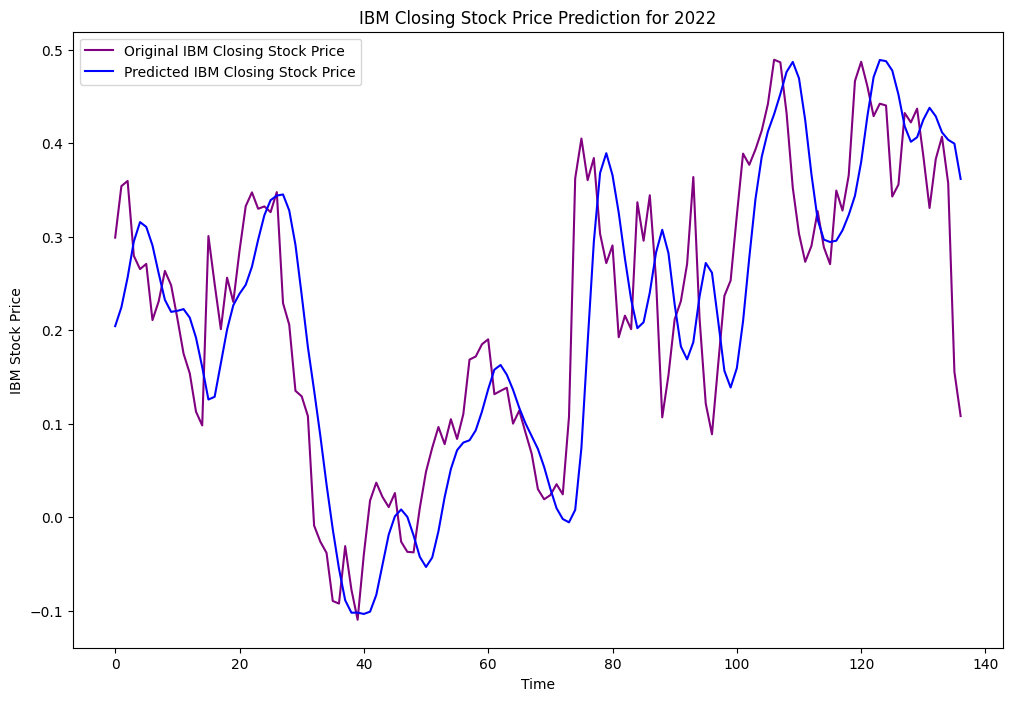

In [16]:
real_stock_prices = scaler.transform(test_set.reshape(-1,1))
plt.figure(figsize=(12,8))
plt.plot(real_stock_prices,color='purple',label='Original IBM Closing Stock Price')
plt.plot(predicted_stock_prices,color='blue',label='Predicted IBM Closing Stock Price')
plt.title('IBM Closing Stock Price Prediction for 2022')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend();

In [17]:
print("RMSE:",np.sqrt(mean_squared_error(real_stock_prices,predicted_stock_prices)))
print("R2 Score:",r2_score(real_stock_prices,predicted_stock_prices))

RMSE: 0.09670042468702626
R2 Score: 0.5865752846194394


In [20]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

NameError: name 'Y_test' is not defined

In [22]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

X = np.random.rand(100, 10, 5)   #input features
y = np.random.randint(2, size=(100, 1))  #  labels (binary)

# Define the LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize variables for cross-validation
n_splits = 5  # Number of folds for cross-validation
f1_scores = []

# Perform cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)
for train_index, test_index in kf.split(X):
    # Split data into training and test sets for cross-validation fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create and train the LSTM model
    model = create_lstm_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Predict probabilities on the test set
    y_pred_proba = model.predict(X_test)
    
    # Convert probabilities to binary predictions
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Calculate the F1 score and append it to the list
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Calculate the average F1 score
avg_f1_score = np.mean(f1_scores)
print("Average F1 Score:", avg_f1_score)


1/1 [==============================] - 0s 461ms/step
Average F1 Score: 0.5929992146783751


In [23]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

X = np.random.rand(100, 10, 5)   #input features
y = np.random.randint(2, size=(100, 1))  #  labels (binary)

# Define the LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize variables for cross-validation
n_splits = 5  # Number of folds for cross-validation
accuracy_scores = []
precision_scores = []
recall_scores = []

# Perform cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)
for train_index, test_index in kf.split(X):
    # Split data into training and test sets for cross-validation fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create and train the LSTM model
    model = create_lstm_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Predict probabilities on the test set
    y_pred_proba = model.predict(X_test)
    
    # Convert probabilities to binary predictions
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Calculate and print classification report
    report = classification_report(y_test, y_pred)
    print(report)
    
    # Extract accuracy, precision, and recall from the classification report
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    accuracy_scores.append(report_dict['accuracy'])
    precision_scores.append(report_dict['1']['precision'])
    recall_scores.append(report_dict['1']['recall'])

# Calculate the average scores
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)


1/1 [==============================] - 0s 427ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20



C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\t

1/1 [==============================] - 0s 420ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.37        20
weighted avg       0.36      0.60      0.45        20



C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\t

1/1 [==============================] - 0s 452ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.40      1.00      0.57         8

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20



C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\t

1/1 [==============================] - 0s 497ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.70      1.00      0.82        14

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20



C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\t

1/1 [==============================] - 0s 430ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.50      1.00      0.67        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20

Average Accuracy: 0.61
Average Precision: 0.61
Average Recall: 1.0


C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srich\.conda\envs\t

In [24]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2001-07-23,-0.143402,1.577439
2001-07-24,0.325050,2.256210
2001-07-25,-0.372849,2.839394
2001-07-26,-1.195030,2.934990
2001-07-27,0.047798,1.759086


In [25]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]